<a href="https://colab.research.google.com/github/becamarotti/MVP-Sprint-Analise-de-Dados/blob/main/BernardoCamarotti_MVP_An%C3%A1liseDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Bernardo Camarotti - Sprint Análise de Dados e Boas Práticas**

Com o intuito de aprender e me aprofundar em análise de dados utilizando Python, escolhi o dataset de vendas de uma grande loja de varejo. O conjunto de dados selecionado contém uma variedade de características relevantes para a análise das vendas.

O conjunto de dados foi obtido no site Kaggle, podendo ser encontrado no link a seguir:
  - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

O dataset contém as vendas dos produtos comercializados pela empresa nos anos de 2015, 2016, 2017 e 2018. Nosso objetivo é compreender as dinâmicas de vendas e fornecer respostas aos questionamentos apresentados a seguir:

- Como foram as vendas nesse período?
- Qual foi o melhor ano de vendas?
- Qual a categoria mais vendida?
- Quais foram os top 10 produtos mais vendidos?
- Quais as regiões mais lucrativas?

Além das análises mencionadas acima, esse projeto visa analisar todas as informações presentes no dataset e, posteriormente, utilizar o modelo de Machine Learning para identificar e filtrar os melhores produtos para comercialização nos próximos anos, além de buscar prever as vendas dos próximos 7 dias, levando em consideração as vendas realizadas nos últimos anos. O projeto é de aprendizado supervisionado, com a técnica de regressão.

##**Conjunto de Dados**

**Row ID**: Identificador da Linha

**Order ID**: Identificador do Pedido

**Order Date**: Data do Pedido

**Ship Date**: Data de Envio

**Ship Mode**: Método de Envio

**Customer ID**: Identificador do Cliente

**Customer Name**: Nome do Cliente

**Segment**: Segmento do Cliente (Consumidor Final ou Corportativo)

**Country**: País do Cliente

**City**: Cidade do Cliente

**State**: Estado do Cliente

**Postal Code**: Código Postal do Cliente

**Region**: Região do Cliente

**Product ID**: Identificador do Produto

**Category**: Categoria do Produto

**Sub-Category**: Sub-Categoria do Produto

**Product Name**: Nome do Produto

**Sales**: Valor Final da Compra








#**Importando as Bibliotecas**

As linhas a seguir importam as bibliotecas necessárias para a análise e modelagem dos dados.


In [64]:
# Configuração para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

# Importação das bibliotecas
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


# **1. Importando o dataset e visualizando os dados**

As linhas a seguir importam o conjunto de dados para dentro do notebook e exibe as primeiras e últimas linhas, além do tamanho do dataset.


In [2]:
# Importando o dataset para notebook
base = base = pd.read_csv("https://raw.githubusercontent.com/becamarotti/MVP-Sprint-Analise-de-Dados/main/train.csv")

# Exibindo as primeiras 5 linhas, as últimas 5 linhas e a quantidade de linhas e colunas do dataset
display(base)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


# **2. Entendendo a base de dados e realizando os tratamentos**

In [3]:
# Carregando os tipos de dado de cada coluna e se possuem dados nulos
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Podemos observar acima que a coluna "Postal Code" possui valores em branco. Além disso, conforme identificado no dataset, as colunas "Order Date" e "Ship Date" deveriam ser reconhecidas no formato de data.

In [4]:
 # Buscando os valores nulos da coluna 'Postal Code'
base[base['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Podemos observar que todas as linhas da coluna "Postal Code" que estão com valores nulos, são da Cidade "Burlington" e do estado "Vermont".

Dito isto, vamos analisar se encontramos algum registro no dataset do "Postal Code" da cidade de "Burlington" e do estado "Vermont".

In [5]:
# Pesquisando no dataset se tem algum resgistro de Burlington e Vermont que não esteja com o Postal Code nulo
base[(base["City"] == 'Burlington') & (base["State"] == 'Vermont') & (base['Postal Code'].notnull())]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


Não encontramos nenhum registro aonde a cidade seja "Burlington", o estado "Vermont" e que o "Postal Code" não esteja vazio.

Com isso, podemos realizar uma rápida pesquisa no Google para encontrar o "Postal Code" dessa cidade e estado.

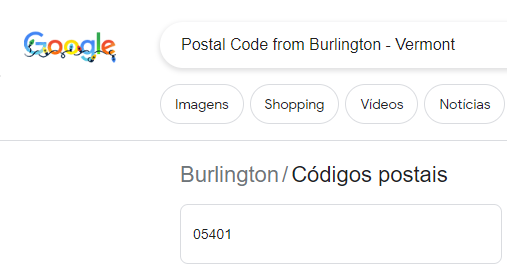

Vamos atualizar os registros nulos com o "Postal Code" encontrado.

In [6]:
# Alterando os valores da coluna "Postal Code" que estão vazios
base.loc[(base["City"] == 'Burlington') & (base["State"] == 'Vermont') & (base['Postal Code'].isnull()), ["Postal Code"]] = 5401

In [7]:
# Verificando se os valores foram atualizados corretamente
base.loc[(base["City"] == 'Burlington') & (base["State"] == 'Vermont') & (base['Postal Code'].notnull())]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,5401.0,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,5401.0,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,5401.0,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,5401.0,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [8]:
# Carregando os tipos de dado de cada coluna
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Observamos que a coluna "Postal Code" não possui mais valores vazios.

Agora, iremos tratar os dados das colunas "Order Date" e "Ship Date". Conforme analisado anteriormente, as linhas deveriam ser reconhecidas em data.

In [9]:
# Transformando os dados da coluna 'Order Date' para data
base['Order Date'] = pd.to_datetime(base['Order Date'])

In [10]:
# Verificando se o Type da coluna 'Order Date' está correto
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

Podemos observar que a coluna "Order Date" foi alterada para data.

Faremos o mesmo processo para a coluna "Ship Date".

In [11]:
# Transformando os dados da coluna 'Ship Date' para data
base['Ship Date'] = pd.to_datetime(base['Ship Date'])

In [12]:
# Verificando se o Type da coluna 'Ship Date' está correto
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

Após as tratativas, não temos mais valores vazios e os dados estão no DType correto.

# **3. Analisando os dados**

In [13]:
# Entendendo as estatísticas da coluna 'Sales'
base['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

Antes de iniciar a análise dos dados, entendemos como está a dispersão dos dados da coluna 'Sales', a média, mediana e desvio padrão.

## **3.1 - Analisando as vendas por ano**

Vamos realizar uma análise das vendas dos produtos por ano, com o intuito de determinar qual ano se destacou como o período de vendas mais expressivo para a empresa.

In [14]:
# Observando em que ano foi o primeiro pedido
base['Order Date'].min()

Timestamp('2015-01-02 00:00:00')

In [15]:
# Observando em que ano foi o último pedido
base['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

Observando acima, podemos ver que são 4 anos de análise (de 2015 até 2018).

Para facilitar a análise, criaremos uma coluna auxiliar com os anos.

In [16]:
# Criando a coluna auxiliar com o ano da coluna "Order Date"
base['Ano'] = base['Order Date'].dt.year

In [17]:
# Verificando se a coluna de 'Ano' foi criada corretamente
base.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017


In [18]:
# Criando um groupby para faciliar a análise e a construção do gráfico
base.groupby('Ano')['Sales'].sum()

Ano
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

Observando o group by acima, conseguimos identificar que o ano de 2018 foi o melhor ano de vendas.

Vamos gerar um gráfico para uma melhor visualização.

In [19]:
# Para a criação dos gráficos, utilizaremos o .index para representar os anos no eixo X
base.groupby('Ano')['Sales'].sum().index

Int64Index([2015, 2016, 2017, 2018], dtype='int64', name='Ano')

In [20]:
# Para a criação dos gráficos, utilizaremos o .values para representar as vendas no eixo Y
base.groupby('Ano')['Sales'].sum().values

array([479856.2081, 459436.0054, 600192.55  , 722052.0192])

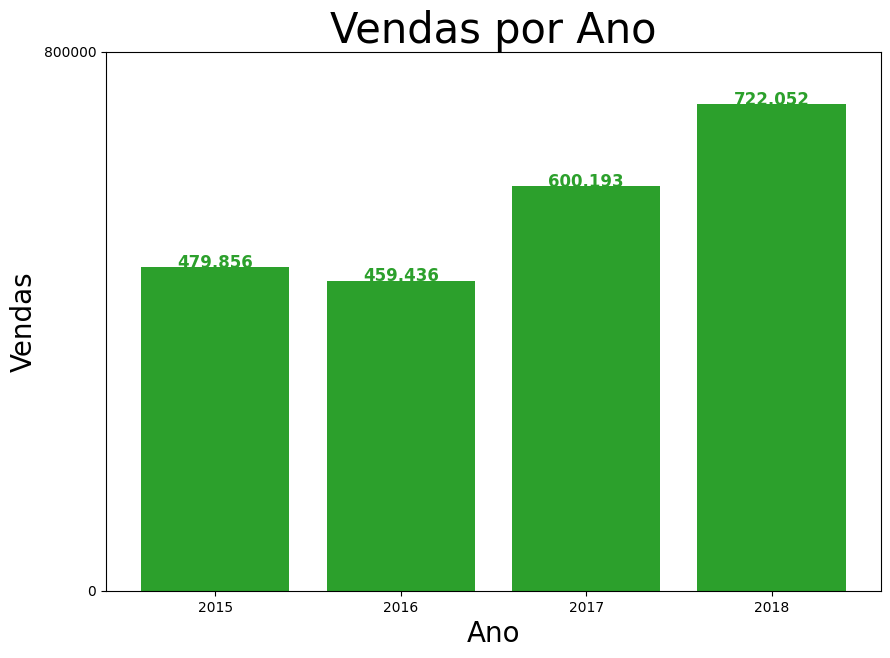

In [21]:
fig, ax = plt.subplots(figsize= (10,7)) # Criar a figura para plotagem do gráfico

color_bar = 'tab:green' # Cor da barra
sum_year = base.groupby('Ano')['Sales'].sum() # Criar uma variável para simplificar o código

ax.bar(sum_year.index, sum_year.values, color= color_bar) # Criando o gráfico de barras
ax.set_ylabel('Vendas', fontsize= 20) # Colocando a legenda do eixo Y
ax.set_xlabel('Ano', fontsize= 20) # Colocando a legenda do eixo X
ax.set_title('Vendas por Ano', fontsize= 30) # Colocando o título do gráfico

ax.set_xticks([2015, 2016, 2017, 2018]) # Melhorando os valores presentes no eixo X
ax.set_yticks([0,800000]) # Melhorando os valores presentes no eixo Y

for i in range(0,4): # Criando o rótulo de dados do gráfico
  ax.annotate('{:,.0f}'.format(sum_year.values[i]), # Formatando o rótulo de dados para não ter casas decimais
   (sum_year.index[i], sum_year.values[i]), ha='center', color= color_bar, fontsize= 12, fontweight='bold') #Colocando os valores no final da barra e em cada ano

plt.show()

Podemos observar visualmente que o ano de 2018 destacou-se como o período de vendas mais robusto para a empresa. Em 2015, as vendas atingiram 479.856, seguidas por uma ligeira queda em 2016, registrando 459.436. No entanto, a partir desse ponto, a empresa teve um crescimento constante nas vendas, alcançando a marca significativa de 722.052 em 2018, representando um aumento percentual de 20,29% em relação ao ano anterior.

## **3.2 - Analisando as vendas por mês**

Vamos realizar uma análise das vendas dos produtos por mês em cada ano, com o intuito de determinar quais meses se destacaram e quais não tiveram um bom resultado.

Para facilitar a análise, criaremos uma coluna auxiliar com os meses.

In [22]:
# Criando a coluna auxiliar com o mês da "Order Date"
base['Mes'] = base['Order Date'].dt.month

In [23]:
 # Visualizando como ficou a coluna mês em nosso dataFrame
base.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,8
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,12


In [24]:
# Criando o groupby para facilitar a análise e a construção do gráfico
base.groupby(['Mes', 'Ano'])['Sales'].sum()

Mes  Ano 
1    2015    28828.2540
     2016    29347.3864
     2017    38048.1840
     2018    59767.0910
2    2015    12588.4840
     2016    20728.3520
     2017    48907.5900
     2018    48928.8334
3    2015    54027.6920
     2016    34489.6776
     2017    48990.1410
     2018    74748.6238
4    2015    24710.0160
     2016    38056.9685
     2017    42368.0480
     2018    37849.2156
5    2015    29520.4900
     2016    30761.5585
     2017    64836.2518
     2018    40882.4464
6    2015    29181.3346
     2016    28515.9082
     2017    37424.6810
     2018    46912.8475
7    2015    35194.5580
     2016    28573.3100
     2017    41761.9430
     2018    53942.7755
8    2015    37349.2655
     2016    49076.9300
     2017    45766.8144
     2018    75408.7840
9    2015    65956.3998
     2016    65352.9970
     2017    40692.3063
     2018    73153.3640
10   2015    34561.9470
     2016    31631.8890
     2017    52156.9580
     2018    65501.1622
11   2015    64369.4565
     2

In [25]:
base.groupby(['Mes', 'Ano'])['Sales'].sum().index

MultiIndex([( 1, 2015),
            ( 1, 2016),
            ( 1, 2017),
            ( 1, 2018),
            ( 2, 2015),
            ( 2, 2016),
            ( 2, 2017),
            ( 2, 2018),
            ( 3, 2015),
            ( 3, 2016),
            ( 3, 2017),
            ( 3, 2018),
            ( 4, 2015),
            ( 4, 2016),
            ( 4, 2017),
            ( 4, 2018),
            ( 5, 2015),
            ( 5, 2016),
            ( 5, 2017),
            ( 5, 2018),
            ( 6, 2015),
            ( 6, 2016),
            ( 6, 2017),
            ( 6, 2018),
            ( 7, 2015),
            ( 7, 2016),
            ( 7, 2017),
            ( 7, 2018),
            ( 8, 2015),
            ( 8, 2016),
            ( 8, 2017),
            ( 8, 2018),
            ( 9, 2015),
            ( 9, 2016),
            ( 9, 2017),
            ( 9, 2018),
            (10, 2015),
            (10, 2016),
            (10, 2017),
            (10, 2018),
            (11, 2015),
            (11,

O índice do groupby está em MultiIndex, e para facilitar a análise e criação dos gráficos, transformaremos o nosso groupby em um dataframe

In [26]:
# Transformando o groupby em um Dataframe com a função .reset_index()
sum_month = base.groupby(['Mes', 'Ano'])['Sales'].sum().reset_index()

In [27]:
# Exibindo as 5 primeiras linhas do nosso novo dataframe
sum_month.head()

,Mes,Ano,Sales
0,1,2015,28828.2540
1,1,2016,29347.3864
2,1,2017,38048.1840
3,1,2018,59767.0910
4,2,2015,12588.4840


Para analisarmos as vendas por Mês, criaremos o gráfico de barras para uma melhor visualização dos dados.

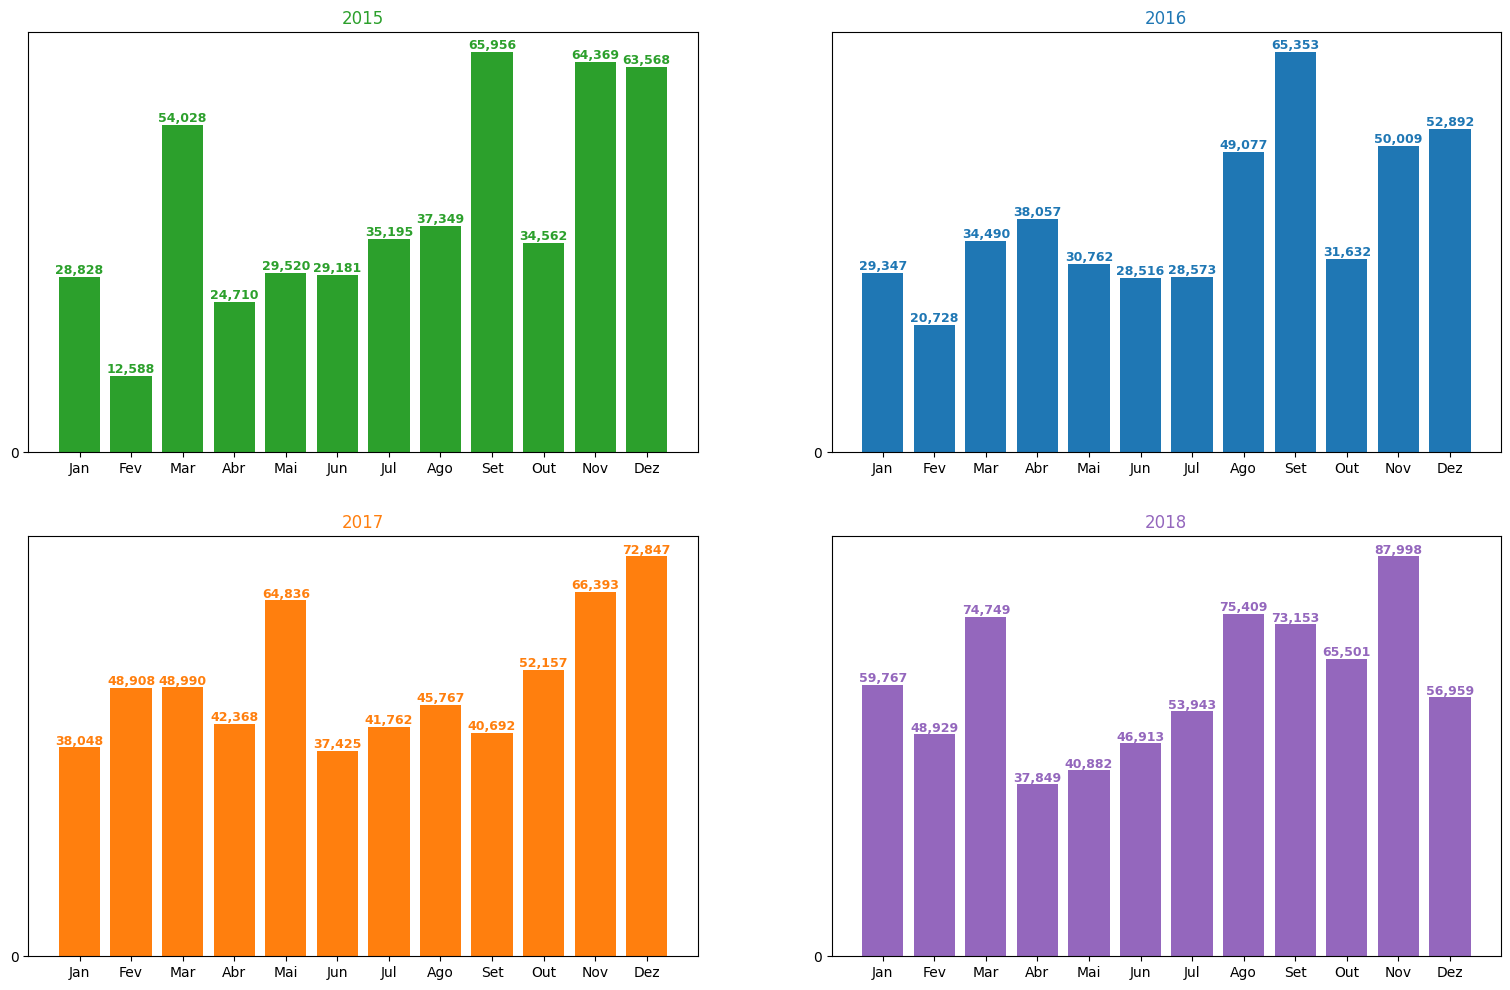

In [28]:
fig, ax = plt.subplots(nrows= 2, ncols= 2, figsize=(19,12)) # Criar a figura para plotagem do gráfico. Utilizaremos 2 linhas e 2 colunas para plotar 4 gráficos.

color_bar_2015 = 'tab:green' # Cor da barra de 2015
color_bar_2016 = 'tab:blue' # Cor da barra de 2016
color_bar_2017 = 'tab:orange' # Cor da barra de 2017
color_bar_2018 = 'tab:purple' # Cor da barra de 2018

ax[0][0].set_yticks([0,95000]) # Melhorando os valores presentes no eixo Y no primeiro gráfico da primeira linha
ax[0][1].set_yticks([0,95000]) # Melhorando os valores presentes no eixo Y no segundo gráfico da primeira linha
ax[1][0].set_yticks([0,95000]) # Melhorando os valores presentes no eixo Y no primeiro gráfico da segunda linha
ax[1][1].set_yticks([0,95000]) # Melhorando os valores presentes no eixo Y no segundo gráfico da segunda linha

ax[0][0].bar(sum_month[sum_month['Ano'] == 2015]['Mes'].values, sum_month[sum_month['Ano'] == 2015]['Sales'].values, color= color_bar_2015, label= 2015) # Criando o gráfico de barras de 2015
ax[0][1].bar(sum_month[sum_month['Ano'] == 2016]['Mes'].values, sum_month[sum_month['Ano'] == 2016]['Sales'].values, color= color_bar_2016, label= 2016) # Criando o gráfico de barras de 2016
ax[1][0].bar(sum_month[sum_month['Ano'] == 2017]['Mes'].values, sum_month[sum_month['Ano'] == 2017]['Sales'].values, color= color_bar_2017, label= 2017) # Criando o gráfico de barras de 2017
ax[1][1].bar(sum_month[sum_month['Ano'] == 2018]['Mes'].values, sum_month[sum_month['Ano'] == 2018]['Sales'].values, color= color_bar_2018, label= 2018) # Criando o gráfico de barras de 2018

ax[0][0].set_title(2015, color= color_bar_2015) # Colocando o título no gráfico de 2015
ax[0][1].set_title(2016, color= color_bar_2016) # Colocando o título no gráfico de 2016
ax[1][0].set_title(2017, color= color_bar_2017) # Colocando o título no gráfico de 2017
ax[1][1].set_title(2018, color= color_bar_2018) # Colocando o título no gráfico de 2018

for i in range(0,12): # Criando o rótulo de dados do gráfico 2015
  ax[0][0].annotate('{:,.0f}'.format(sum_month[sum_month['Ano'] == 2015]['Sales'].values[i]), # Formatando o rótulo de dados para não ter casas decimais
   (sum_month[sum_month['Ano'] == 2015]['Mes'].values[i], sum_month[sum_month['Ano'] == 2015]['Sales'].values[i]+500), ha='center', color= color_bar_2015, fontsize= 9, fontweight='bold') # Colocando os valores no final da barra e em cada mês

for i in range(0,12): # Criando o rótulo de dados do gráfico 2016
  ax[0][1].annotate('{:,.0f}'.format(sum_month[sum_month['Ano'] == 2016]['Sales'].values[i]), # Formatando o rótulo de dados para não ter casas decimais
   (sum_month[sum_month['Ano'] == 2016]['Mes'].values[i], sum_month[sum_month['Ano'] == 2016]['Sales'].values[i]+500), ha='center', color= color_bar_2016, fontsize= 9, fontweight='bold') # Colocando os valores no final da barra e em cada mês

for i in range(0,12): # Criando o rótulo de dados do gráfico 2017
  ax[1][0].annotate('{:,.0f}'.format(sum_month[sum_month['Ano'] == 2017]['Sales'].values[i]), # Formatando o rótulo de dados para não ter casas decimais
   (sum_month[sum_month['Ano'] == 2017]['Mes'].values[i], sum_month[sum_month['Ano'] == 2017]['Sales'].values[i]+500), ha='center', color= color_bar_2017, fontsize= 9, fontweight='bold') # Colocando os valores no final da barra e em cada mês

for i in range(0,12): # Criando o rótulo de dados do gráfico 2018
  ax[1][1].annotate('{:,.0f}'.format(sum_month[sum_month['Ano'] == 2018]['Sales'].values[i]), # Formatando o rótulo de dados para não ter casas decimais
   (sum_month[sum_month['Ano'] == 2018]['Mes'].values[i], sum_month[sum_month['Ano'] == 2018]['Sales'].values[i]+500), ha='center', color= color_bar_2018, fontsize= 9, fontweight='bold') # Colocando os valores no final da barra e em cada mês

ax[0][0].xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x do ano 2015
ax[0][0].set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']) # Colocando rótulo no eixo de 2015
ax[0][0].tick_params(axis='x',labelsize=10) # Melhorando o visual do eixo x de 2015

ax[0][1].xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x do ano 2016
ax[0][1].set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']) # Colocando rótulo no eixo de 2016
ax[0][1].tick_params(axis='x',labelsize=10) # Melhorando o visual do eixo x de 2016

ax[1][0].xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x do ano 2017
ax[1][0].set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']) # Colocando rótulo no eixo de 2017
ax[1][0].tick_params(axis='x',labelsize=10) # Melhorando o visual do eixo x de 2017

ax[1][1].xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x do ano 2018
ax[1][1].set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']) # Colocando rótulo no eixo de 2018
ax[1][1].tick_params(axis='x',labelsize=10) # Melhorando o visual do eixo x de 2018

plt.show()

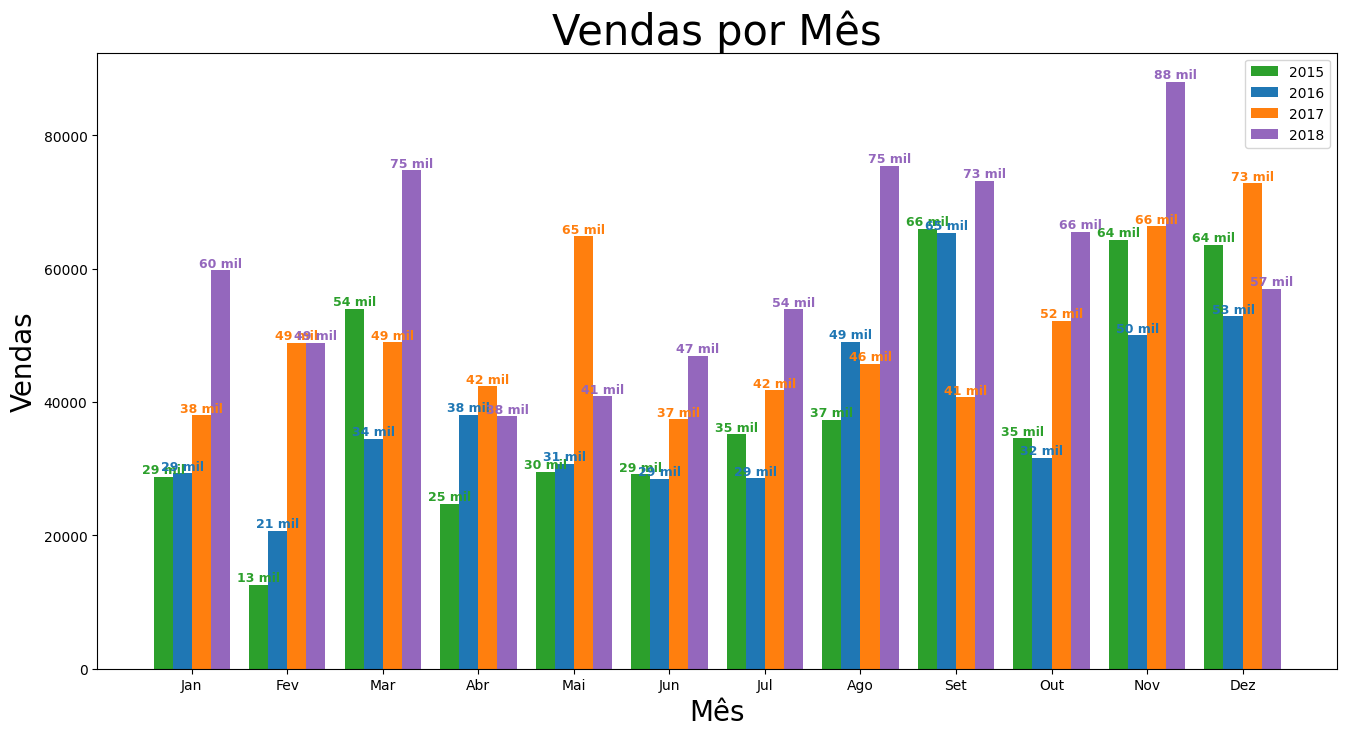

In [29]:
fig, ax = plt.subplots(figsize=(16,8)) # Criar a figura para plotagem do gráfico.

color_bar_2015 = 'tab:green' # Cor da barra de 2015
color_bar_2016 = 'tab:blue' # Cor da barra de 2016
color_bar_2017 = 'tab:orange' # Cor da barra de 2017
color_bar_2018 = 'tab:purple' # Cor da barra de 2018

widh = 0.2 # Criando uma variável para facilitar no espaçamento entre os gráficos de barra e a análise ficar mais visual

ax.bar(sum_month[sum_month['Ano'] == 2015]['Mes'].values-widh-widh/2, sum_month[sum_month['Ano'] == 2015]['Sales'].values, color= color_bar_2015, label= 2015, width = widh) # Criando o gráfico de barras de 2015
ax.bar(sum_month[sum_month['Ano'] == 2016]['Mes'].values-widh/2, sum_month[sum_month['Ano'] == 2016]['Sales'].values, color= color_bar_2016, label= 2016, width = widh) # Criando o gráfico de barras de 2016
ax.bar(sum_month[sum_month['Ano'] == 2017]['Mes'].values+widh/2, sum_month[sum_month['Ano'] == 2017]['Sales'].values, color= color_bar_2017, label= 2017, width = widh) # Criando o gráfico de barras de 2017
ax.bar(sum_month[sum_month['Ano'] == 2018]['Mes'].values+widh+widh/2, sum_month[sum_month['Ano'] == 2018]['Sales'].values, color= color_bar_2018, label= 2018, width = widh) # Criando o gráfico de barras de 2018

ax.set_ylabel('Vendas', fontsize= 20) # Colocando o nome do eixo Y
ax.set_xlabel('Mês', fontsize= 20) # Colocando o nome do eixo X
ax.set_title('Vendas por Mês', fontsize= 30) # Colocando o título do gráfico

for i in range(0,12): # Criando o rótulo de dados do gráfico 2015
  ax.annotate('{:,.0f} mil'.format(sum_month[sum_month['Ano'] == 2015]['Sales'].values[i]/1000), # Formatando o rótulo de dados para não ter casas decimais
   (sum_month[sum_month['Ano'] == 2015]['Mes'].values[i]-widh-widh/2, sum_month[sum_month['Ano'] == 2015]['Sales'].values[i]+500), ha='center', color= color_bar_2015, fontsize= 9, fontweight='bold') #colocando os valores no final da barra e em cada mês

for i in range(0,12): # Criando o rótulo de dados do gráfico 2016
  ax.annotate('{:,.0f} mil'.format(sum_month[sum_month['Ano'] == 2016]['Sales'].values[i]/1000), # Formatando o rótulo de dados para não ter casas decimais
   (sum_month[sum_month['Ano'] == 2016]['Mes'].values[i]-widh/2, sum_month[sum_month['Ano'] == 2016]['Sales'].values[i]+500), ha='center', color= color_bar_2016, fontsize= 9, fontweight='bold') #colocando os valores no final da barra e em cada mês

for i in range(0,12): # Criando o rótulo de dados do gráfico 2017
  ax.annotate('{:,.0f} mil'.format(sum_month[sum_month['Ano'] == 2017]['Sales'].values[i]/1000), # Formatando o rótulo de dados para não ter casas decimais
   (sum_month[sum_month['Ano'] == 2017]['Mes'].values[i]+widh/2, sum_month[sum_month['Ano'] == 2017]['Sales'].values[i]+500), ha='center', color= color_bar_2017, fontsize= 9, fontweight='bold') #colocando os valores no final da barra e em cada mês

for i in range(0,12): # Criando o rótulo de dados do gráfico 2018
  ax.annotate('{:,.0f} mil'.format(sum_month[sum_month['Ano'] == 2018]['Sales'].values[i]/1000), # Formatando o rótulo de dados para não ter casas decimais
   (sum_month[sum_month['Ano'] == 2018]['Mes'].values[i]+widh+widh/2, sum_month[sum_month['Ano'] == 2018]['Sales'].values[i]+500), ha='center', color= color_bar_2018, fontsize= 9, fontweight='bold') #colocando os valores no final da barra e em cada mês



ax.xaxis.set_ticks(np.arange(1,13)) # Ajustando os valores de x
ax.set_xticklabels(['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']) # Colocando rótulo no eixo X com os meses
ax.tick_params(axis='x',labelsize=10) # Melhorando o visual do eixo x

ax.legend() # Colocando a legenda dos anos dentro do gráfico para identificar as cores

plt.show()

Analisando o gráfico de vendas por mês nos últimos 4 anos, observamos que o mehor mês de venda da empresa foi em novembro de 2018. O mês de novembro sempre performou bem nos últimos anos.

Conseguimos observar que os 2 últimos meses dos anos sempre foram os melhores em vendas, podendo ser por conta da Black Friday e Natal.

Graficamente, conseguimos analisar também que o mês de abril sempre foi abaixo.

## **3.3 - Analisando as categorias mais vendidas**

Vamos realizar uma análise das categorias dos produtos, com o intuito de determinar qual categoria se destacou como a mais expressiva em vendas para a empresa.

In [30]:
# Visualizando as 3 primeiras linhas da base
base.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,8
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,12


In [31]:
# Criando um groupby para faciliar a análise e a construção do gráfico
base.groupby(['Category'])['Sales'].sum()

Category
Furniture          728658.5757
Office Supplies    705422.3340
Technology         827455.8730
Name: Sales, dtype: float64

In [32]:
# Para a criação dos gráficos, utilizaremos o .index para representar os as categorias no eixo X
base.groupby(['Category'])['Sales'].sum().index

Index(['Furniture', 'Office Supplies', 'Technology'], dtype='object', name='Category')

In [33]:
# Para a criação dos gráficos, utilizaremos o .values para representar as vendas no eixo X
base.groupby(['Category'])['Sales'].sum().values

array([728658.5757, 705422.334 , 827455.873 ])

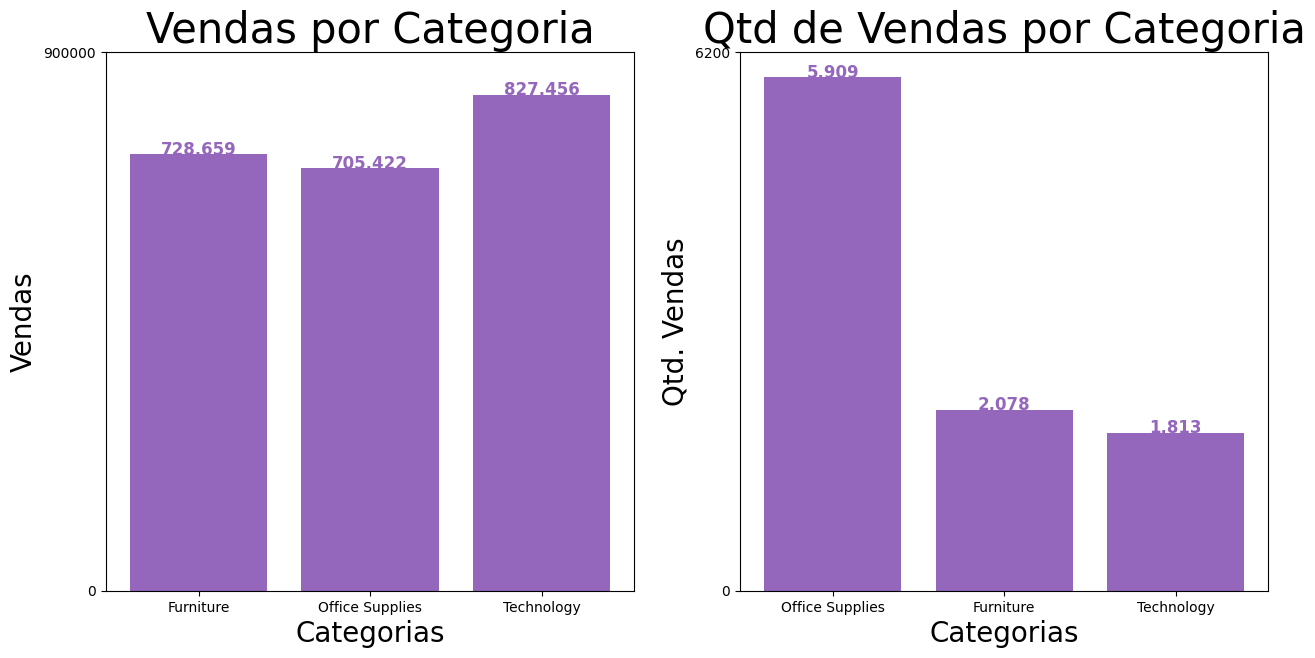

In [34]:
fig, ax = plt.subplots( nrows=1, ncols=2,figsize= (15,7)) # Criar a figura para plotagem do gráfico

color_bar = 'tab:purple' #cor da barra
category_sales = base.groupby(['Category'])['Sales'].sum() # Criar uma variável para simplificar o código
category_qtd = base['Category'].value_counts()

ax[0].bar(category_sales.index, category_sales.values, color= color_bar) # Criando o gráfico de barras
ax[0].set_ylabel('Vendas', fontsize= 20) # Colocando a legenda do eixo Y
ax[0].set_xlabel('Categorias', fontsize= 20) # Colocando a legenda do eixo X
ax[0].set_title('Vendas por Categoria', fontsize= 30) # Colocando o título do gráfico

ax[1].bar(category_qtd.index, category_qtd.values, color= color_bar) # Criando o gráfico de barras
ax[1].set_ylabel('Qtd. Vendas', fontsize= 20) # Colocando a legenda do eixo Y
ax[1].set_xlabel('Categorias', fontsize= 20) # Colocando a legenda do eixo X
ax[1].set_title('Qtd de Vendas por Categoria', fontsize= 30) # Colocando o título do gráfico


ax[0].set_yticks([0,900000]) # Melhorando os valores presentes no eixo Y
ax[1].set_yticks([0,6200]) # Melhorando os valores presentes no eixo Y

for i in range(0,3): # Criando o rótulo de dados do gráfico
  ax[0].annotate('{:,.0f}'.format(category_sales.values[i]), # Formatando o rótulo de dados para não ter casas decimais
   (category_sales.index[i], category_sales.values[i]), ha='center', color= color_bar, fontsize= 12, fontweight='bold') # Colocando os valores no final da barra e em cada ano


for i in range(0,3): # Criando o rótulo de dados do gráfico
  ax[1].annotate('{:,.0f}'.format(category_qtd.values[i]), # Formatando o rótulo de dados para não ter casas decimais
   (category_qtd.index[i], category_qtd.values[i]), ha='center', color= color_bar, fontsize= 12, fontweight='bold') #colocando os valores no final da barra e em cada ano

plt.show()

Acim,a podemos observar que a categoria mais lucrativa é a de 'Technology'. A categoria de 'Office Supplies' é a que mais vende em unidades.

## **3.4 - Analisando os top 10 produtos mais vendidos**

Iremos analisar os top 10 produtos mais lucrativos da empresa.

In [35]:
# Visualizando as 3 primeiras linhas
base.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,8
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,12


In [36]:
# Criando o groupby dos itens mais vendidos e utilizando a função .sort_values para deixar a coluna 'Sales' decrescente
product_sales = base.groupby('Product Name')['Sales'].sum().sort_values(ascending= False)

# Transformando o groupby criando em um dataframe para facilitar a criação dos gráficos
product_sales = product_sales.reset_index()


In [37]:
# Criando uma variável com os top 10 itens mais vendidos
top_10_products = product_sales.head(10)

# Exibindo os 10 itens que serão utilizados no gráfico
top_10_products

,Product Name,Sales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


In [38]:
# Visualizando o .values da coluna 'Product Name'
top_10_products['Product Name'].values

array(['Canon imageCLASS 2200 Advanced Copier',
       'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind',
       'Cisco TelePresence System EX90 Videoconferencing Unit',
       'HON 5400 Series Task Chairs for Big and Tall',
       'GBC DocuBind TL300 Electric Binding System',
       'GBC Ibimaster 500 Manual ProClick Binding System',
       'Hewlett Packard LaserJet 3310 Copier',
       'HP Designjet T520 Inkjet Large Format Printer - 24" Color',
       'GBC DocuBind P400 Electric Binding System',
       'High Speed Automatic Electric Letter Opener'], dtype=object)

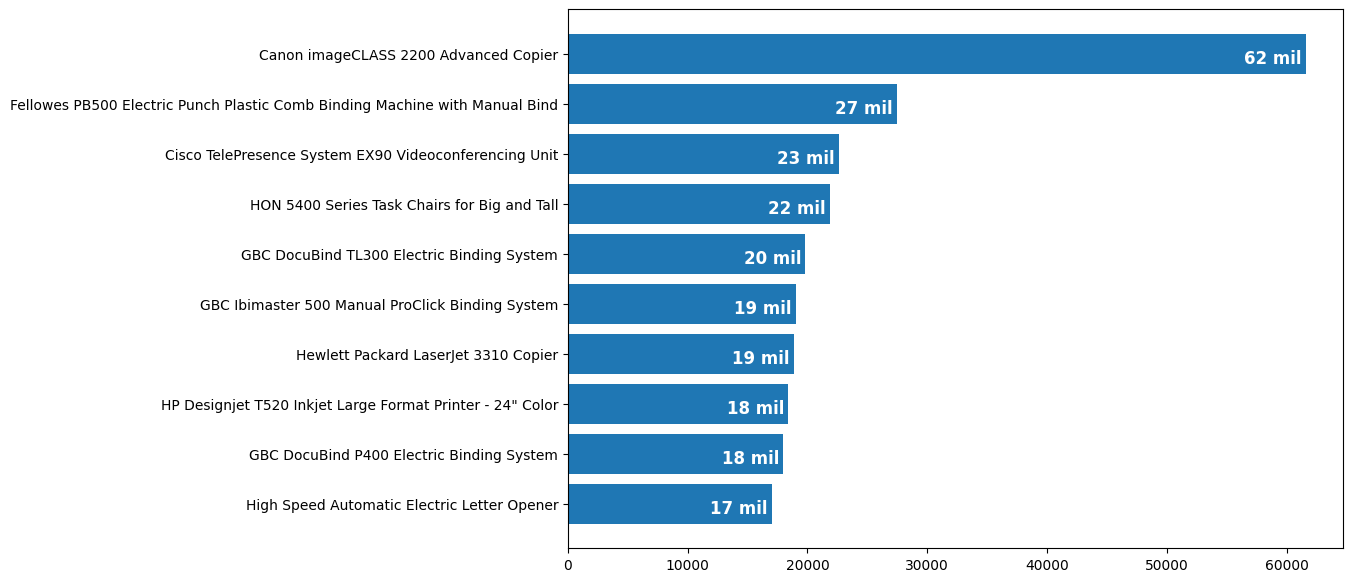

In [39]:
fig, ax = plt.subplots(figsize= (10,7)) # Criar a figura para plotagem do gráfico

ax.barh(top_10_products['Product Name'].values, top_10_products['Sales'].values) # Criando o gráfico de barras invertidas
ax.invert_yaxis() # Invertendo o eixo Y, deixando do maior para o menor

for i in np.arange(0,10): # Criando o rótulo de dados do gráfico
    ax.annotate('{:,.0f} mil'.format(top_10_products['Sales'].values[i]/1000), # Formatando o rótulo de dados para não ter casas decimais
                (top_10_products['Sales'].values[i]-1000,i), ha="center", va="top", xytext=(-15,3), color="white", textcoords="offset points", fontsize=12, fontweight='bold') # Colocando os valores no final da barra e em cada ano


plt.show()

Acima conseguimos ver os top 10 produtos mais lucrativos da empresa.

Temos uma diferença bem grande entre o primeiro produto (que é uma impressora de escritório) para o segundo.

## **3.5 - Analisando os melhores estados e regiões**

Nessa análise, buscaremos entender quais são as melhores regiões de vendas e os estados que mais compram da empresa.

In [40]:
# Visualizando as 3 primeiras linhas da base
base.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,8
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,12


In [41]:
# Criando um groupby para faciliar a análise e a construção do gráfico
base.groupby(['Region'])['Sales'].sum().sort_values(ascending= False)

Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64

In [42]:
# Criando um groupby para faciliar a análise e a construção do gráfico
base.groupby(['State'])['Sales'].sum().sort_values(ascending= False)

State
California              446306.4635
New York                306361.1470
Texas                   168572.5322
Washington              135206.8500
Pennsylvania            116276.6500
Florida                  88436.5320
Illinois                 79236.5170
Michigan                 76136.0740
Ohio                     75130.3500
Virginia                 70636.7200
North Carolina           55165.9640
Indiana                  48718.4000
Georgia                  48219.1100
Kentucky                 36458.3900
Arizona                  35272.6570
New Jersey               34610.9720
Colorado                 31841.5980
Wisconsin                31173.4300
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27322.9990
Maryland                 23705.5230
Rhode Island             22525.0260
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

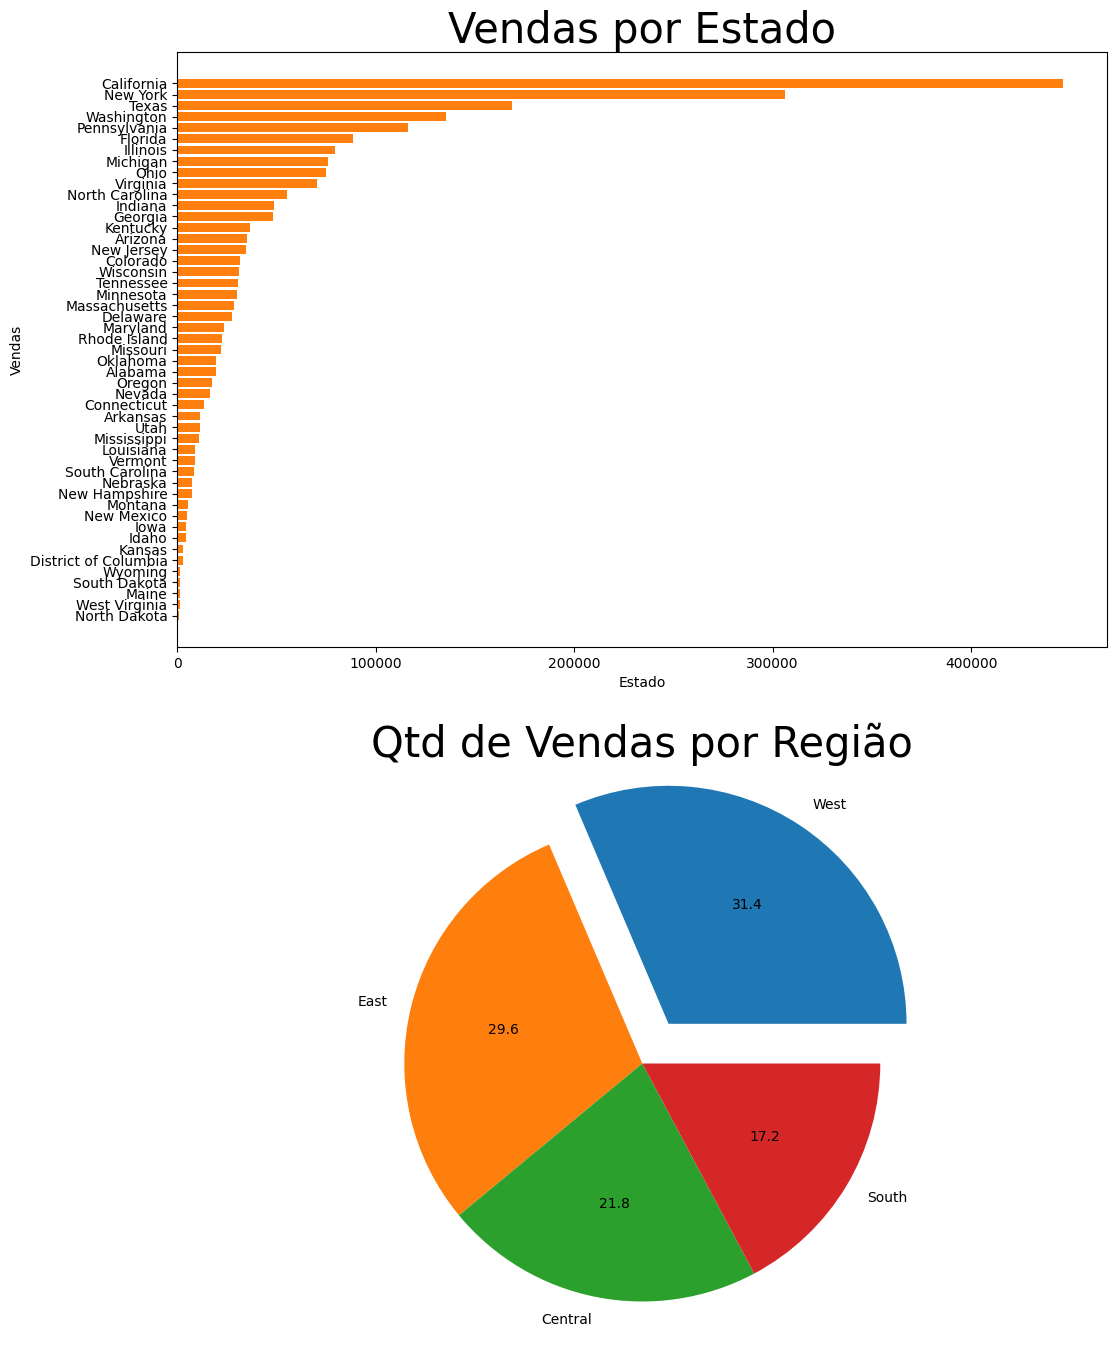

In [43]:
fig, ax = plt.subplots( nrows=2, ncols=1,figsize= (12,17)) # Criar a figura para plotagem do gráfico

color_bar = 'tab:orange' # Cor da barra invertida
category_region = base.groupby(['Region'])['Sales'].sum().sort_values(ascending= False) # Criar uma variável para simplificar o código
category_state = base.groupby(['State'])['Sales'].sum().sort_values(ascending= False) # Criar uma variável para simplificar o código

ax[0].barh(category_state.index, category_state.values, color= color_bar) # Criando o gráfico de barras invertidas
ax[0].set_ylabel('Vendas', fontsize= 10) # Colocando a legenda do eixo Y
ax[0].set_xlabel('Estado', fontsize= 10) # Colocando a legenda do eixo X
ax[0].set_title('Vendas por Estado', fontsize= 30) # Colocando o título do gráfico
ax[0].invert_yaxis() # Invertendo o eixo Y, deixando do maior para o meno


ax[1].pie(category_region.values, labels= category_region.index, explode= [0.2,0,0,0], autopct='%.1f') # Criando o gráfico de pizza
ax[1].set_title('Qtd de Vendas por Região', fontsize= 30) # Colocando o título do gráfico




plt.show()

Com os gráficos acima, podemos dizer que as regiões mais lucrativas são a 'West' e 'East', sendo o estado da 'California' e 'New York' os estados mais lucrativos.

#**4 -Pré-processamento de dados**

Na etapa de Pré-processamento, realizaremos a padronização e normalização dos dados do dataset para uma futura criação de um modelo de ML.

Vamos aplicar o Label Encoder e o OneHotEncoder

In [44]:
# Visualizando as 3 primeiras linhas do dataset
base.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,8
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,12


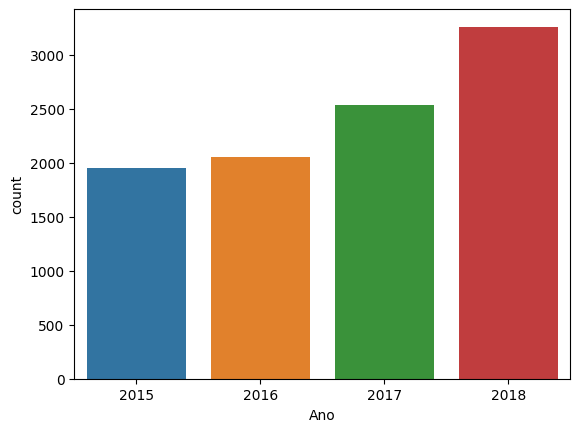

In [45]:
sns.countplot(x = base['Ano']);

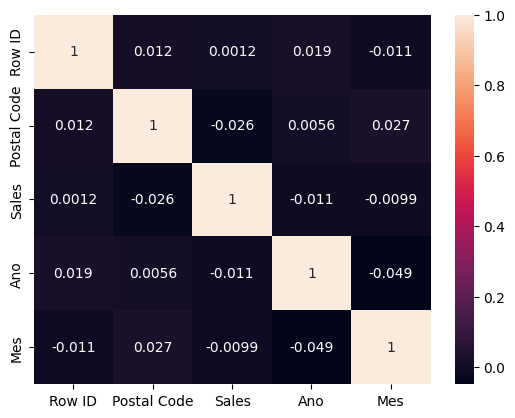

In [46]:
# Criando o heatmap
sns.heatmap(base.corr(numeric_only=True),annot=True);

Conseguimos observar uma baixa correlação entre as colunas com dados numéricos

In [47]:
# Visualizando os dados da 'base'
base

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Ano,Mes
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,12
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,12
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,12


In [48]:
# Criando uma cópia do dataframe, apenas com as colunas que utilizaremos e julgamos necessárias
pre_base = base[['Order Date', 'Ship Date', 'Ship Mode', 'Category', 'Sub-Category', 'Product Name', 'Ano', 'Mes', 'Sales']].copy()

In [49]:
# Visualizando o novo dataframe gerado com as colunas selecionadas
pre_base

,Order Date,Ship Date,Ship Mode,Category,Sub-Category,Product Name,Ano,Mes,Sales
0,2017-08-11,2017-11-11,Second Class,Furniture,Bookcases,Bush Somerset Collection Bookcase,2017,8,261.9600
1,2017-08-11,2017-11-11,Second Class,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",2017,8,731.9400
2,2017-12-06,2017-06-16,Second Class,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,2017,12,14.6200
3,2016-11-10,2016-10-18,Standard Class,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,2016,11,957.5775
4,2016-11-10,2016-10-18,Standard Class,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2016,11,22.3680
...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,Standard Class,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",2017,5,3.7980
9796,2016-12-01,2016-01-17,Standard Class,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",2016,12,10.3680
9797,2016-12-01,2016-01-17,Standard Class,Technology,Phones,GE 30524EE4,2016,12,235.1880
9798,2016-12-01,2016-01-17,Standard Class,Technology,Phones,Anker 24W Portable Micro USB Car Charger,2016,12,26.3760


## **4.1 - Label Encoder**

O Label Encoder transformará todos os dados que estão em formato de string nas colunas que mencionaremos em números inteiros

In [61]:
# Criando uma variável para cada coluna que desejmaos transformar em número inteiro
label_encoder_ShipMode = LabelEncoder()
label_encoder_Category = LabelEncoder()
label_encoder_SubCategory = LabelEncoder()
label_encoder_ProductName = LabelEncoder()


In [78]:
# Aplicando o Label Enconder nas colunas informadas
pre_base['Ship Mode'] = label_encoder_ShipMode.fit_transform(pre_base['Ship Mode'])
pre_base['Category'] = label_encoder_Category.fit_transform(pre_base['Category'])
pre_base['Sub-Category'] = label_encoder_SubCategory.fit_transform(pre_base['Sub-Category'])
pre_base['Product Name'] = label_encoder_ProductName.fit_transform(pre_base['Product Name'])

In [79]:
# Visualizando como ficou a base após a aplicação do Label Encoder
pre_base

,Order Date,Ship Date,Ship Mode,Category,Sub-Category,Product Name,Ano,Mes,Sales
0,2017-08-11,2017-11-11,2,0,4,386,2017,8,261.9600
1,2017-08-11,2017-11-11,2,0,5,838,2017,8,731.9400
2,2017-12-06,2017-06-16,2,1,10,1432,2017,12,14.6200
3,2016-11-10,2016-10-18,3,0,16,366,2016,11,957.5775
4,2016-11-10,2016-10-18,3,1,14,573,2016,11,22.3680
...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,3,1,3,408,2017,5,3.7980
9796,2016-12-01,2016-01-17,3,1,2,277,2016,12,10.3680
9797,2016-12-01,2016-01-17,3,2,13,724,2016,12,235.1880
9798,2016-12-01,2016-01-17,3,2,13,148,2016,12,26.3760


Podemos observar que o Label Encoder transformou todos os dados categórios em números para facilitar o modelo de ML

In [94]:
# Separando o array
X_base = pre_base.values[:,0:8]
y_base = pre_base.values[:,8]

In [95]:
# Separando a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_base, y_base, test_size=0.2, random_state=22)

In [97]:
# Exibindo a quantidade de dados no treino e teste
print(X_train.shape)
print(X_test.shape)


(7840, 8)
(1960, 8)


## **4.2 - OneHotEncoder**

O OneHotEncoder separa cada atributo numérico em uma coluna, assim facilitando a utilização dos algorítimos de Machine Learning

In [73]:
# Criando uma variável com o One Hot
onehotencoder_X = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [2, 3, 4, 5])], remainder='passthrough')

In [80]:
# Aplicando o OneHotEncoder em nossa base
df3 = pd.get_dummies(pre_base, columns=['Ship Mode', 'Category', 'Sub-Category', 'Product Name' ], drop_first=True)

In [81]:
# Visualizando como ficou a base de dados
df3

,Order Date,Ship Date,Ano,Mes,Sales,Ship Mode_1,Ship Mode_2,Ship Mode_3,Category_1,Category_2,...,Product Name_1839,Product Name_1840,Product Name_1841,Product Name_1842,Product Name_1843,Product Name_1844,Product Name_1845,Product Name_1846,Product Name_1847,Product Name_1848
0,2017-08-11,2017-11-11,2017,8,261.9600,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-08-11,2017-11-11,2017,8,731.9400,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-12-06,2017-06-16,2017,12,14.6200,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2016-11-10,2016-10-18,2016,11,957.5775,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-11-10,2016-10-18,2016,11,22.3680,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,2017-05-21,2017-05-28,2017,5,3.7980,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9796,2016-12-01,2016-01-17,2016,12,10.3680,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9797,2016-12-01,2016-01-17,2016,12,235.1880,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9798,2016-12-01,2016-01-17,2016,12,26.3760,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Podemos ver acima a aplicação do One Hot Encoder, criando uma coluna para cada item em nosso DF

#**Conclusão**

Após a análise de toda a base de dados, conseguimos identificar diversos pontos importantes. A grande parte dos consumidores da empresa estão localizados no estado da Califórnia e Nova Iorque.

Além disso, conseguimos identificar quais foram os melhores meses de venda em cada ano, os produtos mais lucrativos da empresa no período de 2015 até 2018, e as categorias mais vendidas.

Os dados presentes na base possibilitam inúmeras análises e conclusões, contribuindo para uma melhor performance nas vendas e a identificação do público consumidor ideal.

Expresso minha gratidão a todos os professores que integraram minha jornada nesta pós-graduação. Esta marca a conclusão da minha última etapa, e estou extremamente satisfeito com todo o conhecimento adquirido ao longo destes meses.

Boas festas e muito obrigado por tudo!



